In [1]:
from google.colab import drive

# 1. Google Drive 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 2. 파일 경로 설정 (사용자 지정 경로)
data_root = '/content/drive/MyDrive/Colab Notebooks/datathon'
# file_path = f'{data_root}/2019-Nov.csv'

#데이터 불러오기 + 기본 전처리

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [15]:
sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# 폰트 파일 경로 지정
font_path = '/content/drive/MyDrive/font/NanumGothic.ttf'

# 폰트 등록 및 matplotlib 설정
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)

In [4]:
df = pd.read_csv(f'{data_root}/2019-Nov.csv')

In [5]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...
67501974,2019-11-30 23:59:58 UTC,view,15700137,2053013559733912211,NaN,NaN,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
67501975,2019-11-30 23:59:58 UTC,view,28719425,2053013565639492569,apparel.shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
67501976,2019-11-30 23:59:59 UTC,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
67501977,2019-11-30 23:59:59 UTC,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0


In [6]:
# event_time을 datetime으로 변환
df['event_time'] = pd.to_datetime(df['event_time'])

In [7]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...
67501974,2019-11-30 23:59:58+00:00,view,15700137,2053013559733912211,NaN,NaN,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
67501975,2019-11-30 23:59:58+00:00,view,28719425,2053013565639492569,apparel.shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
67501976,2019-11-30 23:59:59+00:00,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
67501977,2019-11-30 23:59:59+00:00,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0


In [8]:
# 날짜, 시간 파생 -> 일자별 트렌드, 리텐션, 시계열 그래프 or 시간대별 유입/이탈 분석, 마케팅 시간 설정 가능
df['event_date'] = df['event_time'].dt.date
df['event_hour'] = df['event_time'].dt.hour

In [9]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2019-11-01,0
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,2019-11-01,0
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,2019-11-01,0
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,2019-11-01,0
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,2019-11-01,0
...,...,...,...,...,...,...,...,...,...,...,...
67501974,2019-11-30 23:59:58+00:00,view,15700137,2053013559733912211,NaN,NaN,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b,2019-11-30,23
67501975,2019-11-30 23:59:58+00:00,view,28719425,2053013565639492569,apparel.shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359,2019-11-30,23
67501976,2019-11-30 23:59:59+00:00,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb,2019-11-30,23
67501977,2019-11-30 23:59:59+00:00,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0,2019-11-30,23


In [10]:
# 결측값 제거: user_id가 없으면 행동 분석이 불가 -> user_id는 결측값 X
df = df.dropna(subset=['user_id'])

In [11]:
# 정렬
df = df.sort_values(by=['user_id', 'event_time'])

In [12]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour
8425249,2019-11-06 06:51:52+00:00,view,26300219,2053013563424899933,NaN,sokolov,40.54,10300217,d1fdcbf1-bb1f-434b-8f1a-4b77f29a84a0,2019-11-06,6
15378293,2019-11-10 02:08:39+00:00,view,13200917,2053013557192163841,furniture.bedroom.bed,NaN,514.81,29515875,5dd49822-9349-42d6-a165-cd4642ee606b,2019-11-10,2
15381235,2019-11-10 02:14:40+00:00,view,13201002,2053013557192163841,furniture.bedroom.bed,stendmebel,176.04,29515875,eb6882fb-ead2-47a5-aa86-d171a2c3b6ff,2019-11-10,2
19418807,2019-11-12 03:42:01+00:00,view,13200917,2053013557192163841,furniture.bedroom.bed,NaN,514.81,29515875,1552ef43-4001-4ab7-a9c7-44e99f1730a9,2019-11-12,3
19418937,2019-11-12 03:42:06+00:00,view,13200917,2053013557192163841,furniture.bedroom.bed,NaN,514.81,29515875,1552ef43-4001-4ab7-a9c7-44e99f1730a9,2019-11-12,3
...,...,...,...,...,...,...,...,...,...,...,...
67501893,2019-11-30 23:59:27+00:00,view,2600400,2053013563970159485,NaN,NaN,208.47,579969711,6f2aeb5c-6276-462b-b4cb-767131a7081b,2019-11-30,23
67501908,2019-11-30 23:59:34+00:00,view,2600400,2053013563970159485,NaN,NaN,208.47,579969711,6f2aeb5c-6276-462b-b4cb-767131a7081b,2019-11-30,23
67501927,2019-11-30 23:59:40+00:00,view,2600400,2053013563970159485,NaN,NaN,208.47,579969711,6f2aeb5c-6276-462b-b4cb-767131a7081b,2019-11-30,23
67501929,2019-11-30 23:59:40+00:00,view,4804718,2053013554658804075,electronics.audio.headphone,apple,329.14,579969767,e159d1a1-6668-4777-985d-26ac82afd9ba,2019-11-30,23


#EDA

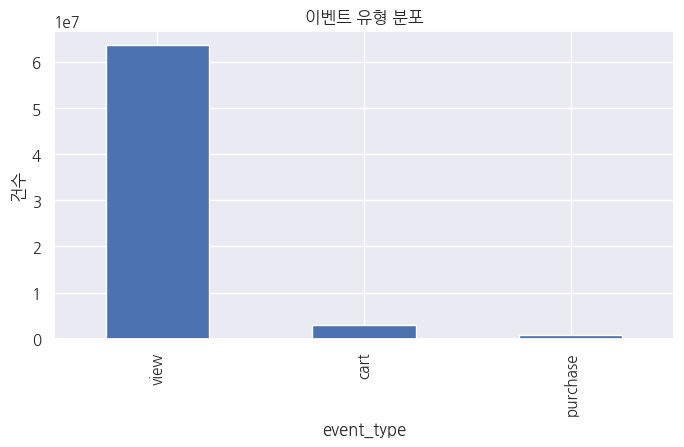

In [16]:
# 이벤트 유형 분포 확인
df['event_type'].value_counts().plot(kind='bar', title='이벤트 유형 분포', figsize=(8,4))
plt.xlabel('event_type'); plt.ylabel('건수')
plt.show()


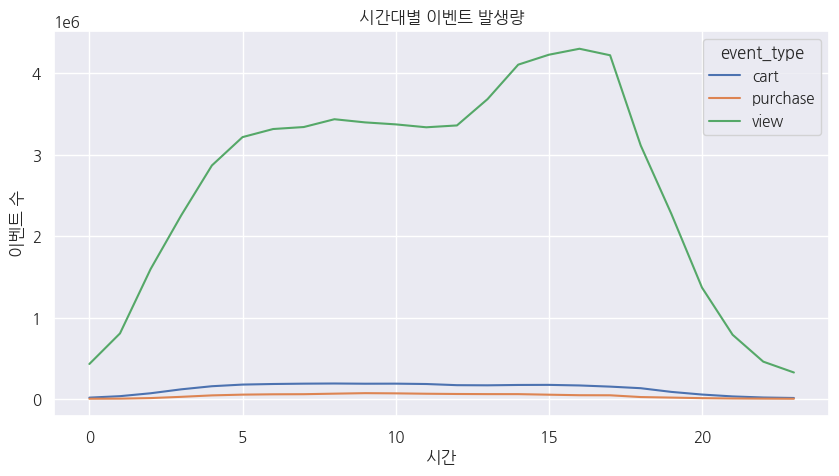

In [17]:
# 시간대별 사용자 행동
hourly = df.groupby(['event_hour', 'event_type']).size().unstack()
hourly.plot(kind='line', figsize=(10,5), title='시간대별 이벤트 발생량')
plt.xlabel('시간'); plt.ylabel('이벤트 수')
plt.show()


#신규 고객 정의 및 행동 분석

In [18]:
# 신규 고객: 11월 내 처음 등장한 유저
first_event = df.groupby('user_id')['event_time'].min().reset_index()
first_event.columns = ['user_id', 'first_event_time']
df = df.merge(first_event, on='user_id')
df['days_since_first'] = (df['event_time'] - df['first_event_time']).dt.days
# df

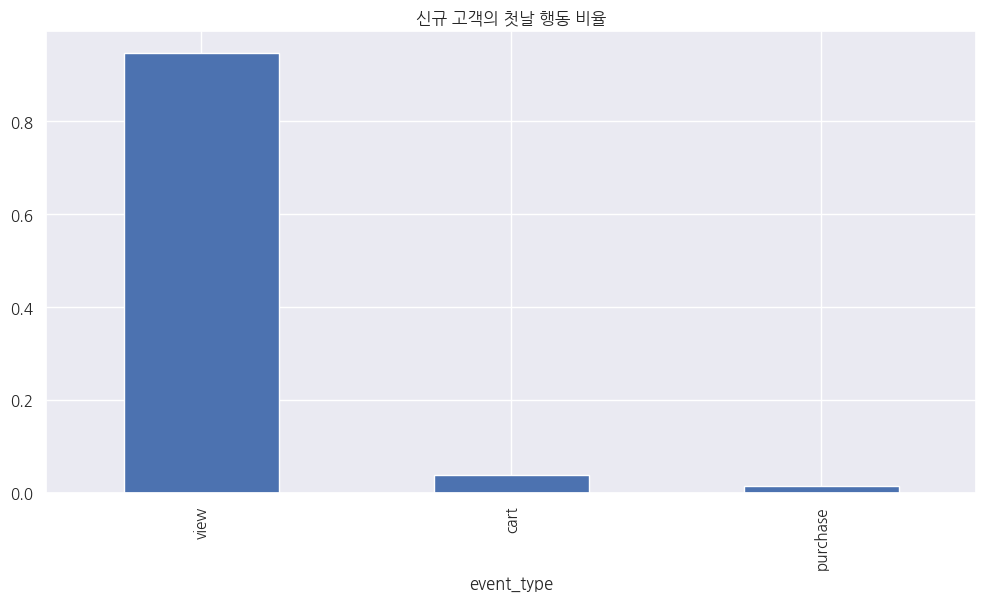

In [21]:
# 첫 방문 시 행동 분석
first_day_events = df[df['days_since_first'] == 0]
first_day_events['event_type'].value_counts(normalize=True).plot(kind='bar', title='신규 고객의 첫날 행동 비율')
plt.show()

#리텐션 분석 (3일 내 재방문 여부)

In [ ]:
# 3일 내 2일 이상 방문한 유저 추출
retention = df[df['days_since_first'] <= 3].groupby('user_id')['event_date'].nunique().reset_index()
retention['retained_3day'] = retention['event_date'] >= 2

# 전체 리텐션율
retention_rate = retention['retained_3day'].mean()
print(f"3일 내 리텐션율: {retention_rate:.2%}")

#리텐션 영향 요인 탐색

In [ ]:
# 유저별 이벤트 카운트
user_event_counts = df.groupby(['user_id', 'event_type']).size().unstack(fill_value=0)

# 리텐션 여부 결합
user_event_counts = user_event_counts.merge(retention[['user_id', 'retained_3day']], on='user_id')

# 평균 비교
print(user_event_counts.groupby('retained_3day')[['view', 'cart', 'purchase']].mean())

시각화: 장바구니 vs 리텐션

In [ ]:
sns.boxplot(x='retained_3day', y='cart', data=user_event_counts)
plt.title('장바구니 행동 vs 리텐션 여부')
plt.xlabel('3일 내 재방문 여부')
plt.ylabel('cart 이벤트 수')
plt.show()